# DataCamp - Data Scientist Career Track (Python)

##  Merging DataFrames with pandas                 


In [1]:
data_folder = "C:/Users/Utilizador/Dropbox/Python/ficheiros/DataCamp/DataCamp - Merging DataFrames with pandas/"

packages

In [2]:
import pandas as pd

##    CHAPTER 1  - Preparing data

#### Exercício 1 - Reading multiple data files

In [3]:
#vídeo
#Reading multiple data files

#Tools for pandas data import:
#pd.read_csv() for CSV files
#pd.read_excel()
#pd.read_html()
#pd.read_json()

# Using a loop
filenames = [data_folder + 'sales-jan-2015.csv', data_folder + 'sales-feb-2015.csv']
dataframes = []
for f in filenames:
    dataframes.append(pd.read_csv(f))

# Using a comprehension
filenames = [data_folder + 'sales-jan-2015.csv', data_folder + 'sales-feb-2015.csv']
dataframes = [pd.read_csv(f) for f in filenames]

# Using glob
from glob import glob
filenames = glob(data_folder + 'sales*.csv')
dataframes = [pd.read_csv(f) for f in filenames]


Exercício 2

In [4]:
# Reading DataFrames from multiple files

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv(data_folder + "Bronze.csv")

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv(data_folder + "Silver.csv")

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv(data_folder + "Gold.csv")

# Print the first five rows of gold
print(gold.head())


   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


Exercício 3

In [5]:
# Reading DataFrames from multiple files in a loop

# Create the list of file names: filenames
filenames = [data_folder + 'Gold.csv', data_folder + 'Silver.csv', data_folder + 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())


   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


Exercício 4

In [6]:
# Combining DataFrames from multiple data files (clumsy method)

# combine the three DataFrames from earlier exercises - gold, silver, & bronze - into a single DataFrame called medals...

# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels (nomes do ficheiro 'gold.csv' subst 'Gold' por 'Total'): new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())


   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


#### Exercício 5 - Reindexing DataFrames

In [7]:
%%script false
#vídeo
# Reindexing DataFrames

# “Indexes” vs. “Indices”
#  ● indices: many index labels within Index data structures   <-----------
#  ● indexes: many pandas Index data structures                <-----------

w_mean = pd.read_csv('quarterly_mean_temp.csv', index_col='Month')
w_max = pd.read_csv('quarterly_max_temp.csv', index_col='Month')

# Examining the data --> o index de w_mean está por ordem alfabética (Apr, Jan, Jul, Oct), o do w_max não (Jan, Apr, Jul, Oct)

# .reindex()  
ordered = ['Jan', 'Apr', 'Jul', 'Oct']
w_mean2 = w_mean.reindex(ordered)       # o index de w_mean2 já aparece pela ordem dita

# .sort_index()
w_mean2.sort_index()  # volta ao inicial

# Reindex from a DataFrame Index
w_mean.reindex(w_max.index)  # põe o index do w_mean igual ao do w_max (Jan, Apr, Jul, Oct)

# Reindexing with missing labels
w_mean3 = w_mean.reindex(['Jan', 'Apr', 'Dec'])   # o Indice 'Dec' aparece com valor NaN

w_max.reindex(w_mean3.index)   # fica com os Indices ('Jan', 'Apr', 'Dec') e em 'Dec' NaN também, por isso

w_max.reindex(w_mean3.index).dropna()  # sai o Indice 'Dec'


Couldn't find program: 'false'


Exercício 6

In [8]:
%%script false
# Sorting DataFrame with the Index & columns

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('monthly_max_temp.csv', index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')


Couldn't find program: 'false'


Exercício 7

In [9]:
%%script false
# Reindexing DataFrame from a list

year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex weather1 using the list year: weather2
weather2 =  weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()             # preenche os NaN de acordo com o valor imediatamente anterior

# Print weather3
print(weather3)


Couldn't find program: 'false'


Exercício 8

In [10]:
# Reindexing using another DataFrame Index

names_1881 = pd.read_csv(data_folder + "names1881.csv")
names_1981 = pd.read_csv(data_folder + "names1981.csv")

print(names_1981.shape)
print(names_1881.shape)
print("")

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)     # (1934, 3), ok

# Drop rows with null counts: common_names
common_names = common_names.dropna() # ??

# Print shape of new common_names
print(common_names.shape)


(19454, 3)
(1934, 3)

(1934, 3)
(1934, 3)


#### Exercício 9 - Arithmetic with Series & DataFrames

In [11]:
#vídeo
#Arithmetic with Series & DataFrames

weather = pd.read_csv(data_folder + "pittsburgh2013.csv", index_col='Date', parse_dates=True)
weather.loc['2013-7-1':'2013-7-7', 'PrecipitationIn']

# Scalar multiplication
print(weather.loc['2013-07-01':'2013-07-07', 'PrecipitationIn'] * 2.54)      # faz com todas as colunas sem ser o index, 1 neste caso

print("======================================================================")

week1_range = weather.loc['2013-07-01':'2013-07-07', ['Min TemperatureF', 'Max TemperatureF']]
week1_mean = weather.loc['2013-07-01':'2013-07-07', 'Mean TemperatureF']

week1_range / week1_mean 
   # the column labels don't match:
   # RuntimeWarning: Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects
    
# Divide 
print(week1_range.divide(week1_mean, axis='rows'))  #assim já dá

print("======================================================================")

# Percentage changes
print(week1_mean.pct_change() * 100)

print("======================================================================")
print("======================================================================")

# .csv Olympic medals
bronze
silver
gold

print((bronze + silver).head())        # se não houver linhas compatíveis aparece NaN

print("======================================================================")

print(bronze.add(silver).head())           #é o mesmo que o anterior, mas é mais flexível porque dá para tirar os NaN

print("======================================================================")

print(bronze.add(silver, fill_value=0).head())

print("======================================================================")

print(bronze + silver + gold)

print("======================================================================")

# Chaining .add()
bronze.add(silver, fill_value=0).add(gold, fill_value=0)



Date
2013-07-01    0.4572
2013-07-02    0.3556
2013-07-03    0.0000
2013-07-04    0.6350
2013-07-05    0.0508
2013-07-06    0.1524
2013-07-07    0.2540
Name: PrecipitationIn, dtype: float64
            Min TemperatureF  Max TemperatureF
Date                                          
2013-07-01          0.916667          1.097222
2013-07-02          0.891892          1.135135
2013-07-03          0.910256          1.102564
2013-07-04          0.909091          1.116883
2013-07-05          0.907895          1.131579
2013-07-06          0.897436          1.141026
2013-07-07          0.972222          1.069444
Date
2013-07-01         NaN
2013-07-02    2.777778
2013-07-03    5.405405
2013-07-04   -1.282051
2013-07-05   -1.298701
2013-07-06    2.631579
2013-07-07   -7.692308
Name: Mean TemperatureF, dtype: float64
      NOC                       Country   Total
0  USAUSA    United StatesUnited States  2247.0
1  URSURS      Soviet UnionSoviet Union  1211.0
2  GBRGBR  United KingdomUnited Kingd

C:\Users\Utilizador\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,NOC,Country,Total
0,USAUSAUSA,United StatesUnited StatesUnited States,4335.0
1,URSURSURS,Soviet UnionSoviet UnionSoviet Union,2049.0
2,GBRGBRGBR,United KingdomUnited KingdomUnited Kingdom,1594.0
3,FRAFRAFRA,FranceFranceFrance,1314.0
4,GERGERGER,GermanyGermanyGermany,1211.0
5,AUSAUSAUS,AustraliaAustraliaAustralia,1075.0
6,ITAITAITA,ItalyItalyItaly,1228.0
7,HUNHUNHUN,HungaryHungaryHungary,1053.0
8,SWESWESWE,SwedenSwedenSweden,1021.0
9,NEDNEDNED,NetherlandsNetherlandsNetherlands,782.0


Exercício 10

In [12]:
# Adding unaligned DataFrames

# resposta: a soma de 2 colunas de df diferentes dá a reunião das duas, com NaN's se for o caso

Exercício 11

In [13]:
# Broadcasting in arithmetic formulas

# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32)*5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())


            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


Exercício 12

In [14]:
# Computing percentage growth of GDP

gdp_usa = pd.read_csv(data_folder + "gdp_usa.csv", index_col='DATE', parse_dates=True)
gdp_china = pd.read_csv(data_folder + "gdp_china.csv", index_col='Year', parse_dates=True)

#USA

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp_usa.loc['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()  

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)


              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


Exercício 13

In [15]:
# Converting currency of stocks

sp500 = pd.read_csv(data_folder + "sp500.csv", index_col='Date', parse_dates=True)
exchange = pd.read_csv(data_folder + "exchange.csv", index_col='Date', parse_dates=True)

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head(5))

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis='rows')

# Print the head of pounds
print(pounds.head())


                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


# CHAPTER 2 - Concatenating data


#### Exercício 1 - Appending & concatenating Series

In [16]:
#vídeo
#Appending & concatenating Series

# ● .append(): Series & DataFrame method
#      s1.append(s2)   ----->   Stacks rows of s2 below s1

# ● concat(): pandas module function
#      pd.concat([s1, s2, s3])   ----->  Can stack row-wise and/or column-wise

# concat() & .append()
# ● Equivalence of concat() & .append():
#    ● result1 = pd.concat([s1, s2, s3])
#    ● result2 = s1.append(s2).append(s3)
# ● result1 == result2 elementwise

#EXEMPLO

# Series of US states
northeast = pd.Series(['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'])
south = pd.Series(['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'])
midwest = pd.Series(['IL', 'IN', 'MN', 'MO', 'NE', 'ND', 'SD', 'IA', 'KS', 'MI', 'OH', 'WI'])
west = pd.Series(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR','WA'])

# Using .append()
east = northeast.append(south)
east
# The appended Index
print(east.index)    # não 'continua' o index
print(east.loc[3])   # <--- e por isso mostra o [3] de cada uma


# Using .reset_index()
new_east = northeast.append(south).reset_index(drop=True)   # já cria um index ordenado de 0 a 26
print(new_east.index)

# Using concat()
east = pd.concat([northeast, south])       
print(east.index)

# Using ignore_index
new_east = pd.concat([northeast, south], ignore_index=True)     # maneira de criar o index ordenado de 0 a 26 com o .concat()



Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12, 13, 14, 15, 16],
           dtype='int64')
3    NH
3    MD
dtype: object
RangeIndex(start=0, stop=26, step=1)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12, 13, 14, 15, 16],
           dtype='int64')


Exercício 2

In [17]:
# Appending Series with nonunique Indices

bronze5 = bronze[['NOC', 'Total']].head(5)
bronze5.index = bronze5['NOC']
del bronze5['NOC']
print(bronze5)

silver5 = silver[['NOC', 'Total']].head(5)
silver5.index = silver5['NOC']
del silver5['NOC']
print(silver5)

# If you were to run the command combined = bronze5.append(silver5), how many rows would combined have?

combined = bronze5.append(silver5)  # 10

# And how many rows would combined.loc['United States'] return? 

combined.loc['USA']   # 2


      Total
NOC        
USA  1052.0
URS   584.0
GBR   505.0
FRA   475.0
GER   454.0
      Total
NOC        
USA  1195.0
URS   627.0
GBR   591.0
FRA   461.0
GER   350.0


,Total
NOC,
USA,1052.0
USA,1195.0


Exercício 3

In [18]:
# Appending pandas Series

jan = pd.read_csv(data_folder + "sales-jan-2015.csv", index_col='Date', parse_dates=True)
feb = pd.read_csv(data_folder + "sales-feb-2015.csv", index_col='Date', parse_dates=True)
mar = pd.read_csv(data_folder + "sales-mar-2015.csv", index_col='Date', parse_dates=True)

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)              # fazer o chaining

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print("")
print(quarter1.sum())


Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64

642


Exercício 4

In [19]:
# Concatenating pandas Series along row axis    ------->  achieve the same result by concatenating Series instead.

# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])


Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


#### Exercício 5 - Appending & concatenating DataFrames

In [20]:
%%script false
#vídeo
#Appending & concatenating DataFrames

pd.concat([population, unemployment], axis=0)  #'rows'  ---> é o default
pd.concat([population, unemployment], axis=1)

Couldn't find program: 'false'


Exercício 6

In [21]:
# Appending DataFrames with ignore_index

# MODIFIQUEI: pus títulos para as colunas
names_1881 = pd.read_csv(data_folder + "names1881.csv", names=['name', 'gender', 'count'])
names_1981 = pd.read_csv(data_folder + "names1981.csv", names=['name', 'gender', 'count'])

# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name'] == 'Morgan'])


(19455, 4)
(1935, 4)
(21390, 4)
         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


Exercício 7

In [22]:
%%script false
# Concatenating pandas DataFrames along column axis

# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat([weather_max, weather_mean], axis='columns')

# Print weather
# print(weather)

Couldn't find program: 'false'


Exercício 8

In [23]:
# Reading multiple files to build a DataFrame                                     <-------------------  IMP.

bronze_top5 = pd.read_csv(data_folder + "bronze_top5.csv")
silver_top5 = pd.read_csv(data_folder + "silver_top5.csv")
gold_top5 = pd.read_csv(data_folder + "gold_top5.csv")
################

medals = []
medal_types = ['bronze', 'silver', 'gold']


for medal in medal_types:

    # Create the file name: file_name
    file_name = data_folder + "%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

# Print medals
print(medals)


                bronze  silver    gold
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0


C:\Users\Utilizador\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Agora exemplificando usando os ficheiros maiores:

In [24]:
medals = []
medal_types = ['Bronze', 'Silver', 'Gold']

for medal in medal_types:

    # Create the file name: file_name
    file_name = data_folder + "%s.csv" % medal
    
    # Create list of column names: columns
    columns = ['NOC', 'Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

del medals['NOC']
# Print medals
print(medals.head())

                Bronze  Silver    Gold
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
France           475.0   461.0   378.0
Germany          454.0   350.0   407.0


#### Exercício 9 - Concatenation, keys, & MultiIndexes

In [25]:
%%script false
#vídeo
#Concatenation, keys, & MultiIndexes           

# COMMON COLUMNS AND ROWS

rain2013 = pd.read_csv('q1_rainfall_2013.csv', index_col='Month', parse_dates=True)   # file1
rain2014 = pd.read_csv('q1_rainfall_2014.csv', index_col='Month', parse_dates=True)   #file2

pd.concat([rain2013, rain2014], axis=0)

rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014], axis=0)           # Using multi-index on rows

rain1314.loc[2014]      # Accessing a multi-index


rain1314 = pd.concat([rain2013, rain2014], axis='columns')     # Concatenating columns  - como aqui as colunas têm o mesmo nome:

rain1314 = pd.concat([rain2013, rain2014], keys=[2013, 2014], axis='columns')    # Using a multi-index on columns

rain1314[2013]

rain_dict = {2013: rain2013, 2014: rain2014}              
rain1314 = pd.concat(rain_dict, axis='columns')             # pd.concat() with dict


Couldn't find program: 'false'


Exercício 10

In [26]:
# Concatenating vertically to get MultiIndexed rows

medals = []
medal_types = ['bronze', 'silver', 'gold']

for medal in medal_types:

    file_name = data_folder + "%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals (rows by default): medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals in entirety
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


Exercício 11

In [27]:
# Slicing MultiIndexed DataFrames

# Your task is to sort the DataFrame and to use the pd.IndexSlice to extract specific slices.  #NÃO ESQUECER, pd.IndexSlice


# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice    # A slicer pd.IndexSlice is required when slicing on the inner level of a MultiIndex. Don't forget, inner

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:, 'United Kingdom'], :])


Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


Exercício 12

In [28]:
# Concatenating horizontally to get MultiIndexed columns

# Your task is to concatenate the DataFrames horizontally and to create a MultiIndex on the columns. 
# From there, you can summarize the resulting DataFrame and slice some information from it.

hardware = pd.read_csv(data_folder + "feb-sales-Hardware.csv", index_col='Date', parse_dates=True)
service = pd.read_csv(data_folder + "feb-sales-Service.csv", index_col='Date', parse_dates=True)
software = pd.read_csv(data_folder + "feb-sales-Software.csv", index_col='Date', parse_dates=True)

################

# Concatenate the 3 dataframes: february
february = pd.concat([hardware, software, service], axis='columns', keys=['Hardware', 'Software', 'Service'])

# Print february.info()
print(february.info())
print("==============================================")

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-02-02':'2015-02-08', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

february.head(4)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Software, Company)    9 non-null object
(Software, Product)    9 non-null object
(Software, Units)      9 non-null float64
(Service, Company)     6 non-null object
(Service, Product)     6 non-null object
(Service, Units)       6 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None
                            Hardware         Software Service
                             Company          Company Company
Date                                                         
2015-02-02 08:33:01              NaN            Hooli     NaN
2015-02-02 20:54:49        Mediacore              NaN     NaN
2015-02-03 14:14:18              NaN          Initech     NaN
2015-02-04 15:36:29              NaN        Streeplex     N

Hardware                   Software                  \
                       Company   Product Units    Company   Product Units   
Date                                                                        
2015-02-02 08:33:01        NaN       NaN   NaN      Hooli  Software   3.0   
2015-02-02 20:54:49  Mediacore  Hardware   9.0        NaN       NaN   NaN   
2015-02-03 14:14:18        NaN       NaN   NaN    Initech  Software  13.0   
2015-02-04 15:36:29        NaN       NaN   NaN  Streeplex  Software  13.0   

                    Service                
                    Company Product Units  
Date                                       
2015-02-02 08:33:01     NaN     NaN   NaN  
2015-02-02 20:54:49     NaN     NaN   NaN  
2015-02-03 14:14:18     NaN     NaN   NaN  
2015-02-04 15:36:29     NaN     NaN   NaN

Exercício 13

In [29]:
# Concatenating DataFrames from a dict

jan = pd.read_csv(data_folder + "sales-jan-2015.csv", index_col='Date', parse_dates=True)
feb = pd.read_csv(data_folder + "sales-feb-2015.csv", index_col='Date', parse_dates=True)
mar = pd.read_csv(data_folder + "sales-mar-2015.csv", index_col='Date', parse_dates=True)
#######################

# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)
print("=======================================================")

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
february Mediacore     45
january  Mediacore     15
march    Mediacore     68


#### Exercício 14 - Outer & inner joins

In [30]:
%%script false
#vídeo
#Outer & inner joins

import numpy as np
import pandas as pd

A = np.arange(8).reshape(2,4) + 0.1
B = np.arange(6).reshape(2,3) + 0.2
C = np.arange(12).reshape(3,4) + 0.3

np.hstack([B, A])                    # Stacking arrays horizontally
np.concatenate([B, A], axis=1)       # Stacking arrays horizontally

np.vstack([A, C])                 # Stacking arrays vertically
np.concatenate([A, C], axis=0)    # Stacking arrays vertically

# Incompatible array dimensions
np.concatenate([A, B], axis=0) # incompatible columns
np.concatenate([A, C], axis=1) # incompatible rows


# EXEMPLO
# Population & unemployment data
population = pd.read_csv('population_00.csv', index_col=0)
unemployment = pd.read_csv('unemployment_00.csv', index_col=0)

population_array = np.array(population)    # Converting to arrays
population_array    #print() ---shape: (4, 1)   # Index info is lost

unemployment_array = np.array(unemployment)
population_array    #print() ---shape: (4, 2)   # Index info is lost


# Manipulating data as arrays
np.concatenate([population_array, unemployment_array], axis='columns'))         # shape (4, 3)

# Joins

# ● Joining tables: Combining rows of multiple tables
#    ● Outer join
#        ● Union of index sets (all labels, no repetition)
#        ● Missing fields filled with NaN
#    ● Inner join
#        ● Intersection of index sets (only common labels)

pd.concat([population, unemployment], axis=1, join='inner')    # Concatenation & inner join

pd.concat([population, unemployment], axis=1, join='outer')    # Concatenation & outer join


pd.concat([population, unemployment], join='inner', axis=0)  # Inner join on other axis

Couldn't find program: 'false'


Exercício 15

In [31]:
# Concatenating DataFrames with inner join

bronze_top5 = pd.read_csv(data_folder + "bronze_top5.csv", index_col='Country')
silver_top5 = pd.read_csv(data_folder + "silver_top5.csv", index_col='Country')
gold_top5 = pd.read_csv(data_folder + "gold_top5.csv", index_col='Country')
#####################################

# Create the list of DataFrames: medal_list
medal_list = [bronze_top5, silver_top5, gold_top5]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, axis='columns', keys=['bronze', 'silver', 'gold'], join='inner')

# Print medals
print(medals)

                bronze  silver    gold
                 Total   Total   Total
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0


Exercício 16

In [32]:
%%script false
# Resampling & concatenating DataFrames with inner join                                                  ###????
 
us = pd.read_csv(data_folder + "gdp_usa2.csv", index_col='Year', parse_dates=True)
china = pd.read_csv(data_folder + "gdp_china.csv", index_col='Year', parse_dates=True)
######################

# os dados dos USA são quatrimestrais, os da China anuais, por isso temos que fazer um resample e depois o inner join


# Resample and tidy china: china_annual

# Make a new DataFrame china_annual by resampling the DataFrame china with .resample('A') (i.e., with annual frequency) and chaining two method calls:
#    Chain .pct_change(10) as an aggregation method to compute the percentage change with an offset of ten years.
#    Chain .dropna() to eliminate rows containing null values.
china_annual = china.resample('A').pct_change(10).dropna()


# Resample and tidy us: us_annual
us_annual = us.resample('A').pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis='columns', join='inner')

# Print the result of resampling gdp every decade (i.e., using .resample('10A')) and aggregating with the method .last()
print(gdp.resample('10A').last())


Couldn't find program: 'false'


# Chapter 3 - Merging data

#### Exercício 1 - Merging DataFrames

In [33]:
%%script false
#vídeo
#Merging DataFrames

# Medal DataFrames 
pd.merge(bronze, gold)   # Empty dataframe because the columns have the exact same name

pd.merge(bronze, gold, on='Country')   # Merging on

pd.merge(bronze, gold, on=['NOC', 'Country'])  # Merging on  multiple columns

pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['_bronze', '_gold']).head(4)  # Using suffixes

# Specifying columns to merge

pd.merge(counties, cities, left_on='CITY NAME', right_on='City')     

# > Têm linhas iguais(nomes de cidades) mas nomes de colunas diferentes, por isso temos que especificar:
#      a 'CITY NAME' de counties e 'City' de cities

# pd.merge(cities, counties, left_on='City', right_on='CITY NAME')   # Switching left/right DataFrames


Couldn't find program: 'false'


Exercício 2

In [34]:
# Merging company DataFrames

revenue = pd.DataFrame({'city':['Austin', 'Denver', 'Springfield'], 'revenue':[100, 83, 4]})
managers = pd.DataFrame({'city':['Austin', 'Denver', 'Mendocino'], 'manager':['Charlers', 'Joel', 'Brett']})

print(pd.concat([revenue, managers], axis=1)) #só para ver

combined = pd.merge(revenue, managers, on='city')

# How many rows would combined have?
combined
# Resposta: 2  # the default strategy for pd.merge() is an inner join --> combined will have 2 rows.

          city  revenue       city   manager
0       Austin      100     Austin  Charlers
1       Denver       83     Denver      Joel
2  Springfield        4  Mendocino     Brett


,city,revenue,manager
0,Austin,100,Charlers
1,Denver,83,Joel


Exercício 3

In [35]:
# Merging on a specific column

#primeiro vou adicionar branch_id a cada df porque queriam fazer isso, assim como as outras alterações/adições:
revenue = pd.DataFrame({'branch_id':[10, 20, 30, 47], 'city':['Austin', 'Denver', 'Springfield', 'Mendocino'], 'revenue':[100, 83, 4, 200]})
managers = pd.DataFrame({'branch_id':[10, 20, 47, 31], 'city':['Austin', 'Denver', 'Mendocino', 'Springfield'], 'manager':['Charlers', 'Joel', 'Brett', 'Sally']})
##########################

# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)
print("==============================================================")

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)


   branch_id_x         city  revenue  branch_id_y   manager
0           10       Austin      100           10  Charlers
1           20       Denver       83           20      Joel
2           30  Springfield        4           31     Sally
3           47    Mendocino      200           47     Brett
   branch_id     city_x  revenue     city_y   manager
0         10     Austin      100     Austin  Charlers
1         20     Denver       83     Denver      Joel
2         47  Mendocino      200  Mendocino     Brett


Exercício 4

In [36]:
# Merging on columns with non-matching labels

revenue = pd.DataFrame({'branch_id':[10, 20, 30, 47], 'city':['Austin', 'Denver', 'Springfield', 'Mendocino'], 'revenue':[100, 83, 4, 200], 'state':['TX', 'CO', 'IL', 'CA']})
managers = pd.DataFrame({'branch':['Austin', 'Denver', 'Mendocino', 'Springfield'], 'branch_id':[10, 20, 47, 31], 'manager':['Charlers', 'Joel', 'Brett', 'Sally'], 'state':['TX', 'CO', 'IL', 'CA']})
##########################

# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch')

# Print combined
combined


,branch_id_x,city,revenue,state_x,branch,branch_id_y,manager,state_y
0,10,Austin,100,TX,Austin,10,Charlers,TX
1,20,Denver,83,CO,Denver,20,Joel,CO
2,30,Springfield,4,IL,Springfield,31,Sally,CA
3,47,Mendocino,200,CA,Mendocino,47,Brett,IL


Exercício 5

In [37]:
# Merging on multiple columns

revenue = pd.DataFrame({'branch_id':[10, 20, 30, 47], 'city':['Austin', 'Denver', 'Springfield', 'Mendocino'], 'revenue':[100, 83, 4, 200]})
managers = pd.DataFrame({'branch_id':[10, 20, 47, 31], 'city':['Austin', 'Denver', 'Mendocino', 'Springfield'], 'manager':['Charlers', 'Joel', 'Brett', 'Sally']})

# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

# Print combined
print(combined)


   branch_id       city  revenue state   manager
0         10     Austin      100    TX  Charlers
1         20     Denver       83    CO      Joel
2         47  Mendocino      200    CA     Brett


#### Exercício 6 - Joining DataFrames

In [38]:
%%script false
#vídeo
#Joining DataFrames

pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['/bronze', '/gold'], how='inner')  # inner é o default para merge

pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['/bronze', '/gold'], how='left')  # mantém all rows of the left df

pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['/bronze', '/gold'], how='right')  # mantém all rows of the right df

pd.merge(bronze, gold, on=['NOC', 'Country'], suffixes=['/bronze', '/gold'], how='outer')  # vê pela esq e dir -> aparecem todos

##

population.join(unemployment)   # Using .join(how=‘left')  -----> usa left por default
population.join(unemployment, how= 'right') 
population.join(unemployment, how='inner') #só aparece 1 linha (cód postal 2860)
population.join(unemployment, how= 'outer')

# Which should you use?  --------> usar o que for mais simples para o caso

# ● df1.append(df2): simply stacking vertically 

# ● pd.concat([df1, df2]):
#      ● stacking many horizontally or vertically
#      ● simple inner/outer joins on Indexes

# ● df1.join(df2): inner/outer/left/right joins on Indexes

# ● pd.merge([df1, df2]): many joins on multiple columns


Couldn't find program: 'false'


Exercício 7

In [39]:
# Joining by Index

revenue = pd.DataFrame({'branch_id':[10, 20, 30, 47], 'city':['Austin', 'Denver', 'Springfield', 'Mendocino'], 'revenue':[100, 83, 4, 200], 'state':['TX', 'CO', 'IL', 'CA']})
managers = pd.DataFrame({'branch_id':[10, 20, 47, 31], 'city':['Austin', 'Denver', 'Mendocino', 'Springfield'], 'manager':['Charlers', 'Joel', 'Brett', 'Sally'], 'state':['TX', 'CO', 'IL', 'CA']})
revenue.set_index('branch_id', inplace=True)
managers.set_index('branch_id', inplace=True)

# Choose the function call below that will join the DataFrames on their indexes and return 5 rows 
# with index labels [10, 20, 30, 31, 47]

revenue.join(managers, lsuffix='_rev', rsuffix='_mng', how='outer')


,city_rev,revenue,state_rev,city_mng,manager,state_mng
branch_id,,,,,,
10,Austin,100.0,TX,Austin,Charlers,TX
20,Denver,83.0,CO,Denver,Joel,CO
30,Springfield,4.0,IL,NaN,NaN,NaN
31,NaN,NaN,NaN,Springfield,Sally,CA
47,Mendocino,200.0,CA,Mendocino,Brett,IL


Exercício 8

In [40]:
%%script false
# Choosing a joining strategy

# Suppose you have two DataFrames: students (with columns 'StudentID', 'LastName', 'FirstName', and 'Major') and 
# midterm_results (with columns 'StudentID', 'Q1', 'Q2', and 'Q3' for their scores on midterm questions).

# You want to combine the DataFrames into a single DataFrame grades, and be able to easily spot which students wrote 
# the midterm and which didn't (their midterm question scores 'Q1', 'Q2', & 'Q3' should be filled with NaN values).

# You also want to drop rows from midterm_results in which the StudentID is not found in students.

# Which of the following strategies gives the desired result?

grades = pd.merge(students, midterm_results, how='left')

Couldn't find program: 'false'


Exercício 9

In [41]:
# Left & right merging on multiple columns

sales2 = pd.DataFrame({'city':['Mendocino', 'Denver', 'Austin', 'Springfield', 'Springfield'], 'state':['CA', 'CO', 'TX', 'MO', 'IL'], 'units':[1, 4, 2, 5, 1]})
managers2 = managers.copy()
managers2 = managers2.reset_index()
managers2 = managers2[['city', 'branch_id', 'manager', 'state']]
managers2.columns = ['branch', 'branch_id', 'manager', 'state']
revenue2 = revenue.copy()
revenue2 = revenue2.reset_index()
#####################################################################################

# In both cases, you're looking to figure out how to connect the fields in rows containing Springfield.

# By merging revenue and sales with a right merge, you can identify the missing revenue values. 
# Here, you don't need to specify left_on or right_on because the columns to merge on have matching labels.
revenue2_and_sales2 = pd.merge(revenue2, sales2, how='right', on=['city', 'state'])

print(revenue2_and_sales2)
print("==================================================================")

# By merging sales and managers with a left merge, you can identify the missing manager. Here, the columns to merge on have
# conflicting labels, so you must specify left_on and right_on. 
sales2_and_managers2 = pd.merge(sales2, managers2, how='left', left_on=['city', 'state'], right_on=['branch', 'state'])

print(sales2_and_managers2)

pd.concat([managers2, sales2, revenue2], axis='columns')

   branch_id         city  revenue state  units
0       10.0       Austin    100.0    TX      2
1       20.0       Denver     83.0    CO      4
2       30.0  Springfield      4.0    IL      1
3       47.0    Mendocino    200.0    CA      1
4        NaN  Springfield      NaN    MO      5
          city state  units  branch  branch_id   manager
0    Mendocino    CA      1     NaN        NaN       NaN
1       Denver    CO      4  Denver       20.0      Joel
2       Austin    TX      2  Austin       10.0  Charlers
3  Springfield    MO      5     NaN        NaN       NaN
4  Springfield    IL      1     NaN        NaN       NaN


,branch,branch_id,manager,state,city,state,units,branch_id,city,revenue,state
0,Austin,10.0,Charlers,TX,Mendocino,CA,1,10.0,Austin,100.0,TX
1,Denver,20.0,Joel,CO,Denver,CO,4,20.0,Denver,83.0,CO
2,Mendocino,47.0,Brett,IL,Austin,TX,2,30.0,Springfield,4.0,IL
3,Springfield,31.0,Sally,CA,Springfield,MO,5,47.0,Mendocino,200.0,CA
4,NaN,NaN,NaN,NaN,Springfield,IL,1,NaN,NaN,NaN,NaN


Exercício 10

In [42]:
# Merging DataFrames with outer join

# Perform the first merge: merge_default
merge_default = pd.merge(sales2_and_managers2, revenue2_and_sales2)   #inner by default

# Print merge_default
print(merge_default)
print("=============================================================")

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales2_and_managers2, revenue2_and_sales2, how='outer')        

# Print merge_outer
print(merge_outer)
print("=============================================================")

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales2_and_managers2, revenue2_and_sales2, how='outer', on=['city', 'state'])  

# Print merge_outer_on
print(merge_outer_on)


          city state  units  branch  branch_id   manager  revenue
0       Denver    CO      4  Denver       20.0      Joel     83.0
1       Austin    TX      2  Austin       10.0  Charlers    100.0
2  Springfield    MO      5     NaN        NaN       NaN      NaN
          city state  units  branch  branch_id   manager  revenue
0    Mendocino    CA      1     NaN        NaN       NaN      NaN
1       Denver    CO      4  Denver       20.0      Joel     83.0
2       Austin    TX      2  Austin       10.0  Charlers    100.0
3  Springfield    MO      5     NaN        NaN       NaN      NaN
4  Springfield    IL      1     NaN        NaN       NaN      NaN
5  Springfield    IL      1     NaN       30.0       NaN      4.0
6    Mendocino    CA      1     NaN       47.0       NaN    200.0
          city state  units_x  branch  branch_id_x   manager  branch_id_y  \
0    Mendocino    CA        1     NaN          NaN       NaN         47.0   
1       Denver    CO        4  Denver         20.0    

#### Exercício 11 - Ordered merges

In [43]:
#vídeo
#Ordered merges

hardware = pd.read_csv(data_folder + "feb-sales-Hardware.csv", parse_dates=['Date'])
service = pd.read_csv(data_folder + "feb-sales-Service.csv", parse_dates=['Date'])
software = pd.read_csv(data_folder + "feb-sales-Software.csv", parse_dates=['Date'])
software.sort_values('Date')
hardware.sort_values('Date')

pd.merge(hardware, software)   # Empty DataFrame  --- inner by default

pd.merge(hardware, software, how='outer')         # Using merge(how=‘outer’)

# pd.merge(hardware, software, how='outer').sorted_values('Date')    #não dá

pd.merge_ordered(hardware, software)         # -----> Using merge_ordered()

pd.merge_ordered(hardware, software, on=['Date', 'Company'], suffixes=['_hardware', '_software']).head()   #Using on & suffixes


# Stocks and GDP data

pd.merge_ordered(sp500, gdp_usa, left_on='Date', right_on='DATE')  # Ordered merge

pd.merge_ordered(sp500, gdp_usa, left_on='Date', right_on='DATE', fill_method='ffill')   # Ordered merge with ffill

,Open,High,Low,Close,Volume,Adj Close,VALUE
0,NaN,NaN,NaN,NaN,NaN,NaN,243.1
1,NaN,NaN,NaN,NaN,NaN,NaN,246.3
2,NaN,NaN,NaN,NaN,NaN,NaN,250.1
3,NaN,NaN,NaN,NaN,NaN,NaN,260.3
4,NaN,NaN,NaN,NaN,NaN,NaN,266.2
5,NaN,NaN,NaN,NaN,NaN,NaN,272.9
6,NaN,NaN,NaN,NaN,NaN,NaN,279.5
7,NaN,NaN,NaN,NaN,NaN,NaN,280.7
8,NaN,NaN,NaN,NaN,NaN,NaN,275.4
9,NaN,NaN,NaN,NaN,NaN,NaN,271.7


Exercício 12

In [44]:
# Using merge_ordered()

austin = pd.DataFrame({'date':['2016-01-01', '2016-02-08', '2016-01-17'], 'ratings':['Cloudy', 'Cloudy', 'Sunny']})
houston = pd.DataFrame({'date':['2016-01-04', '2016-01-01', '2016-03-01'], 'ratings':['Rainy', 'Cloudy', 'Rainy']})

# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

print(tx_weather)
print("=========================================================")

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hous'])

print(tx_weather_suff)
print("=========================================================")

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hous'], fill_method='ffill')

print(tx_weather_ffill)


         date ratings
0  2016-01-01  Cloudy
1  2016-01-04   Rainy
2  2016-01-17   Sunny
3  2016-02-08  Cloudy
4  2016-03-01   Rainy
         date ratings_aus ratings_hous
0  2016-01-01      Cloudy       Cloudy
1  2016-01-04         NaN        Rainy
2  2016-01-17       Sunny          NaN
3  2016-02-08      Cloudy          NaN
4  2016-03-01         NaN        Rainy
         date ratings_aus ratings_hous
0  2016-01-01      Cloudy       Cloudy
1  2016-01-04      Cloudy        Rainy
2  2016-01-17       Sunny        Rainy
3  2016-02-08      Cloudy        Rainy
4  2016-03-01      Cloudy        Rainy


Exercício 13

In [45]:
# Using merge_asof()

# Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, 
# but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than 
# the left value will be kept.
#This function can be used to align disparate datetime frequencies without having to first resample.

auto = pd.read_csv(data_folder + "automobiles.csv", parse_dates=['yr'])
oil = pd.read_csv(data_folder + "oil_price.csv", parse_dates=['Date'])


# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')
# Print the tail of merged  --- ver abaixo


# Resample merged: yearly
yearly = merged.resample('A', on='Date')[['mpg', 'Price']].mean()

# Print yearly
print(yearly)

# print yearly.corr()
print(yearly.corr())


merged.tail()

                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.50
1981-12-31  30.185714  38.00
1982-12-31  32.000000  33.85
            mpg     Price
mpg    1.000000  0.948677
Price  0.948677  1.000000


,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
387,27.0,4,140.0,86,2790,15.6,1982-01-01,US,ford mustang gl,1982-01-01,33.85
388,44.0,4,97.0,52,2130,24.6,1982-01-01,Europe,vw pickup,1982-01-01,33.85
389,32.0,4,135.0,84,2295,11.6,1982-01-01,US,dodge rampage,1982-01-01,33.85
390,28.0,4,120.0,79,2625,18.6,1982-01-01,US,ford ranger,1982-01-01,33.85
391,31.0,4,119.0,82,2720,19.4,1982-01-01,US,chevy s-10,1982-01-01,33.85


# Chapter 4 - Case Study: Summer Olympics

#### Exercício 1 - Medals in the Summer Olympics

In [46]:
#vídeo
#Medals in the Summer Olympics

# Does a host country win more medals?

Exercício 2

In [47]:
# Create file path: file_path
file_path = data_folder + "Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv"

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions.head(5))

   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden


Exercício 3

In [48]:
# Create the file path: file_path
file_path = data_folder + "Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv"

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.tail(4))


             Country  NOC
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


Exercício 4

In [49]:
# Building medals DataFrame

#ERA PRECISO 
#You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).

# medals_dict = {}

# for year in editions['Edition']:

#     file_path = "C:/Users/Utilizador/Dropbox/Python/ficheiros/DataCamp/DataCamp - Merging DataFrames with pandas/Summer Olympic medals/summer_{:d}.csv".format(year)
    
#     medals_dict[year] = pd.read_csv(file_path)
    
#     # Select only the columns 'Athlete', 'NOC', and 'Medal' from medals_dict[year].
#     medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
#     # Assign year to column 'Edition' of medals_dict
#     medals_dict[year]['Edition'] = year
    
# # Concatenate medals_dict: medals
# medals = pd.concat(medals_dict, ignore_index=True)

# # Print first and last 5 rows of medals
# print(medals.head())

medals = pd.read_excel(data_folder + "Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS - Cópia.xlsx")

medals.head(5)


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


#### Exercício 5 - Quantifying performance

In [50]:
#vídeo
#Quantifying performance

Exercício 6

In [51]:
# Counting medals by country/edition in a pivot table

medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]   # só querem estas 4 colunas

# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')  # nº de medalhas por país 

# Print the first & last 5 rows of medal_counts
print(medal_counts.iloc[0:4, 0:12])
print("============estes países não ganharam muitas medalhas=============================")
print(medal_counts.iloc[-4:, 0:12])

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS  AUT  AZE  BAH  BAR  BDI
Edition                                                             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0  5.0  NaN  NaN  NaN  NaN
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0  6.0  NaN  NaN  NaN  NaN
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
============estes países não ganharam muitas medalhas=============================
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT  AZE  BAH  BAR  BDI
Edition                                                               
1996     NaN  NaN  3.0  NaN  20.0  2.0  132.0  3.0  1.0  5.0  NaN  1.0
2000     NaN  NaN  5.0  NaN  20.0  1.0  183.0  4.0  3.0  6.0  1.0  NaN
2004     NaN  NaN  NaN  NaN  47.0  NaN  157.0  8.0  5.0  2.0  NaN  NaN
2008     1.0  NaN  2.0  NaN  51.0  6.0  149.0  3.0  7.0  5.0  NaN  NaN


Exercício 7

In [52]:
# Computing fraction of medals per Olympic edition

# Set Index of editions to be 'Edition': totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = round(medal_counts.divide(totals, axis='rows'), 2)

# Print first & last 5 rows of fractions
print(fractions.iloc[0:5, 0:12])
print("==============================================")
print(fractions.iloc[-5:, -12:])


NOC      AFG  AHO  ALG   ANZ  ARG  ARM   AUS   AUT  AZE  BAH  BAR  BDI
Edition                                                               
1896     NaN  NaN  NaN   NaN  NaN  NaN  0.01  0.03  NaN  NaN  NaN  NaN
1900     NaN  NaN  NaN   NaN  NaN  NaN  0.01  0.01  NaN  NaN  NaN  NaN
1904     NaN  NaN  NaN   NaN  NaN  NaN   NaN  0.00  NaN  NaN  NaN  NaN
1908     NaN  NaN  NaN  0.02  NaN  NaN   NaN  0.00  NaN  NaN  NaN  NaN
1912     NaN  NaN  NaN  0.01  NaN  NaN   NaN  0.02  NaN  NaN  NaN  NaN
NOC      UGA   UKR  URS  URU   USA  UZB  VEN  VIE   YUG  ZAM  ZIM  ZZX
Edition                                                               
1992     NaN   NaN  NaN  NaN  0.13  NaN  NaN  NaN   NaN  NaN  NaN  NaN
1996     0.0  0.02  NaN  NaN  0.14  0.0  NaN  NaN  0.01  0.0  NaN  NaN
2000     NaN  0.02  NaN  0.0  0.12  0.0  NaN  0.0  0.01  NaN  NaN  NaN
2004     NaN  0.02  NaN  NaN  0.13  0.0  0.0  NaN   NaN  NaN  0.0  NaN
2008     NaN  0.02  NaN  NaN  0.15  0.0  0.0  0.0   NaN  NaN  0.0  NaN


Exercício 8

In [53]:
# Computing percentage change in fraction of medals won

# ---> The expanding mean provides a way to see this down each column. <---------------------------------- expanding()
# ---> It is the value of the mean with all the data available up to that point in time. 

# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = round(mean_fractions.pct_change() * 100, 2)

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.iloc[0:5, 0:12])
print("===============================================================================")
print(fractions_change.iloc[-5:, 0:12])
fractions_change

NOC  Edition  AFG  AHO  ALG   ANZ  ARG  ARM  AUS    AUT  AZE  BAH  BAR
0       1896  NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN
1       1900  NaN  NaN  NaN   NaN  NaN  NaN  0.0 -33.33  NaN  NaN  NaN
2       1904  NaN  NaN  NaN   NaN  NaN  NaN  0.0 -33.33  NaN  NaN  NaN
3       1908  NaN  NaN  NaN   NaN  NaN  NaN  0.0 -25.00  NaN  NaN  NaN
4       1912  NaN  NaN  NaN -25.0  NaN  NaN  0.0  20.00  NaN  NaN  NaN
NOC  Edition  AFG  AHO  ALG  ANZ   ARG  ARM    AUS   AUT  AZE  BAH  BAR
21      1992  NaN  NaN  NaN  0.0 -7.69  NaN   2.02 -5.00  NaN  NaN  NaN
22      1996  NaN  NaN  NaN  0.0  1.30  NaN  10.83 -4.76  NaN  NaN  NaN
23      2000  NaN  NaN  NaN  0.0  1.11  NaN  12.73 -4.55  NaN  NaN  NaN
24      2004  NaN  NaN  NaN  0.0  8.17  NaN   8.62 -4.35  NaN  NaN  NaN
25      2008  NaN  NaN  NaN  0.0  6.67  NaN   5.80 -4.17  NaN  NaN  NaN


NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-33.33,NaN,...,NaN,NaN,-7.69,NaN,NaN,NaN,NaN,NaN,NaN,37.50
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-33.33,NaN,...,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,-21.21
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-25.00,NaN,...,NaN,NaN,-19.44,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,1912,NaN,NaN,NaN,-25.0,NaN,NaN,0.00,20.00,NaN,...,NaN,NaN,-12.41,NaN,NaN,NaN,NaN,NaN,NaN,0.00
5,1920,NaN,NaN,NaN,0.0,NaN,NaN,-33.33,0.00,NaN,...,NaN,NaN,-6.82,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,1924,NaN,NaN,NaN,0.0,NaN,NaN,12.50,-16.67,NaN,...,NaN,NaN,-1.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7,1928,NaN,NaN,NaN,0.0,200.00,NaN,6.67,-0.00,NaN,...,NaN,25.00,-6.10,NaN,NaN,NaN,inf,NaN,NaN,0.00
8,1932,NaN,NaN,NaN,0.0,-22.22,NaN,4.17,0.00,NaN,...,NaN,-33.33,3.54,NaN,NaN,NaN,0.000000,NaN,NaN,0.00
9,1936,NaN,NaN,NaN,0.0,-14.29,NaN,-14.29,55.56,NaN,...,NaN,0.00,-5.17,NaN,NaN,NaN,-33.330000,NaN,NaN,0.00


#### Exercício 9 - Reshaping and plotting

In [54]:
#vídeo

Exercício 10

In [55]:
# Building hosts DataFrame   
#queremos um dataframe com edition e NOC -> merge editions e ioc_codes, preencher nulos (pôe e tirar index para isto)

hosts = pd.merge(editions, ioc_codes, how='left')

hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Use the .loc[] accessor to find and assign the missing values to the 'NOC' column in hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

print(hosts)


         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


Exercício 11

In [56]:
# Reshaping fraction_change for analysis of China

print(fractions_change.shape)   #(26, 139)

# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='fractions Change')

print(reshaped.shape, fractions_change.shape)

chn = reshaped[reshaped['NOC'] == 'CHN']

print(chn.tail())    #2008 foi em Pequim



(26, 139)
(3588, 3) (26, 139)
     Edition  NOC  fractions Change
567     1992  CHN              8.33
568     1996  CHN              9.62
569     2000  CHN             -3.16
570     2004  CHN              1.45
571     2008  CHN             13.27


Exercício 12

In [57]:
# Merging to compute influence  ---> merge reshaped and hosts and tidy the result (p ver a influência do país organizador)

merged = pd.merge(reshaped, hosts, how='inner')   #hosts já tinha os nulls preenchidos, reshaped tb(?)

print(merged.head())
print("=========================================================")

influence = merged.set_index('Edition').sort_index()

print(influence.head())   # sim tem influência, nesta amostra pelo menos


   Edition  NOC  fractions Change
0     1956  AUS             60.00
1     2000  AUS             12.73
2     1920  BEL             50.00
3     1976  CAN             -0.79
4     2008  CHN             13.27
         NOC  fractions Change
Edition                       
1896     GRE               NaN
1900     FRA            207.14
1904     USA            200.00
1908     GBR            136.25
1912     SWE             77.78


Exercício 13

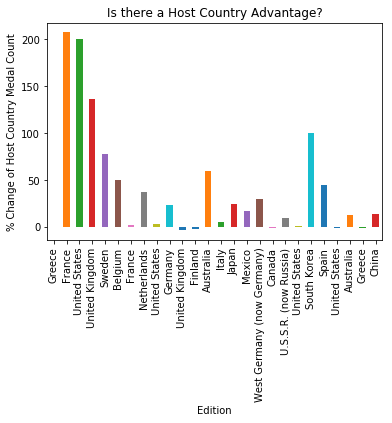

In [58]:
# Plotting influence of host country
%matplotlib inline
import matplotlib.pyplot as plt

change = influence['fractions Change']

graph = change.plot(kind='bar')

# Customize the plot to improve readability
graph.set_ylabel("% Change of Host Country Medal Count")
graph.set_title("Is there a Host Country Advantage?")
graph.set_xticklabels(editions['Country'])

plt.show()


Exercício 14

In [59]:
#vídeo

# Fim